### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [507]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [508]:
data = pd.read_csv('data/coupons.csv')

In [509]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [726]:
# check df structure and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12684 non-null  object 
 1   passanger             12684 non-null  object 
 2   weather               12684 non-null  object 
 3   temperature           12684 non-null  int64  
 4   time                  12684 non-null  object 
 5   coupon                12684 non-null  object 
 6   expiration            12684 non-null  object 
 7   gender                12684 non-null  object 
 8   age                   12610 non-null  float64
 9   maritalStatus         12684 non-null  object 
 10  has_children          12684 non-null  int64  
 11  education             12684 non-null  object 
 12  occupation            12684 non-null  object 
 13  income                12684 non-null  object 
 14  car                   108 non-null    object 
 15  Bar                

2. Investigate the dataset for missing or problematic data.

In [511]:
# Checking for duplicates
duplicate_rows = data[data.duplicated()]
duplicate_rows.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,...,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,...,never,less1,1~3,never,1,1,1,0,1,0


In [512]:
# Removing duplicates, but kepping the last occurrence. 74 rows will be deleted
data_unique = data.drop_duplicates(keep='last')
data_unique.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


3. Decide what to do about your missing data -- drop, replace, other...

<Axes: >

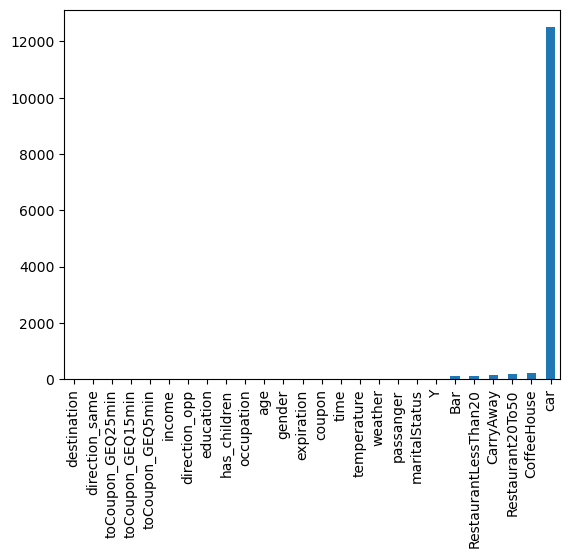

In [513]:
#Checing for missing data
data_unique.isnull().sum().sort_values().plot(kind = 'bar')

In [607]:
# The car data has a lot of missing data, it seems this column data was not provided, however there are rows 
# indicating that the person was driving a car but a scooter or motorcycle. Droping those rows.
# Decided to do not drop the missing values on Bar, Restaurants, and CoffeeHouse because there are values on the other columns 
# the could help to understand better the data
no_driving_list = ['Scooter and motorcycle','do not drive','Car that is too old to install Onstar :D']
data_new = data_unique.query('car not in @no_driving_list')
data_new.shape

(12545, 26)

In [620]:
# Removing extra characteres from age and making it numeric
ages = data_unique['age'].str.replace("50plus","50").str.replace("below21","20").apply(pd.to_numeric)
data['age'] = ages
#Check the values are correct after str replace. Checked the data type on df.info
data_new.age.unique()

array([21, 46, 26, 31, 41, 50, 36, 20])

4. What proportion of the total observations chose to accept the coupon? 


In [721]:
# Since the observations proportion p is the same as the mean μ of the corresponding population of zeros and ones
proportion = data_new.Y.mean()
print(f'The proportion of the total observations chose to accept the coupon is: {proportion}')

The proportion of the total observations chose to accept the coupon is: 0.5674770825029892


5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Coffee House'),
  Text(1, 0, 'Restaurant(<20)'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

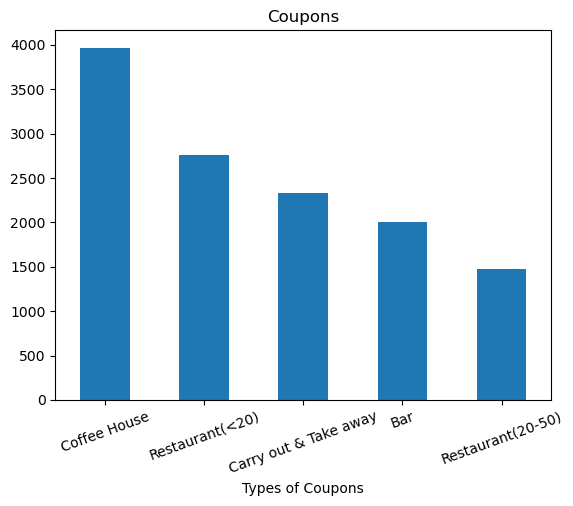

In [729]:
data_new.coupon.value_counts().plot(kind = 'bar')
plt.title('Coupons') # Bar title
plt.xlabel('Types of Coupons') # x label
plt.xticks(rotation = 20) # Column label rotation 20 degress

The following histogram shows the coupons with color on acceptance and the respective counts
The graph shows that cheap restaurants have a good number of acceptance similar to take out
coffe house is almost half and half, finally bars and more expensive restaturants have less acceptance

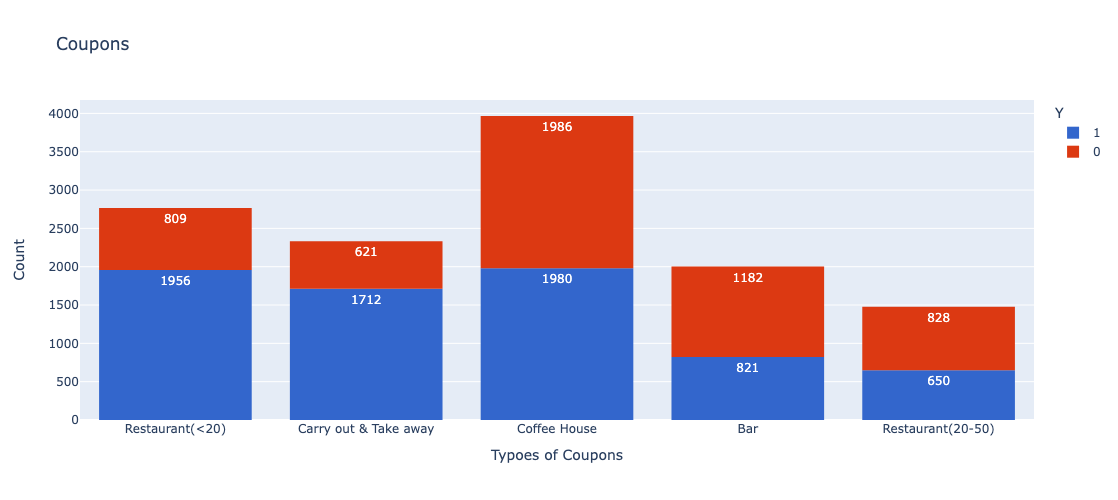

In [725]:
# Ploty histogram
fig1 = px.histogram(data_new, x = 'coupon', 
                    color = 'Y', # Adding a variable on color
                    title = 'Acceptance', # Title of the histogram
                    color_discrete_sequence=px.colors.qualitative.G10, #Palete of colors 
                    #hover_name = 'age', # Adding another variable visible on hover
                    text_auto=True, #Showing values on the columns
                    height=500) #Histogram vertical size
# Add title and axis lables
fig1.update_layout(
    title_text='Coupons', # title of plot
    xaxis_title_text='Typoes of Coupons', # xaxis label
    yaxis_title_text='Count', # yaxis label
)
fig1.show()

6. Use a histogram to visualize the temperature column.

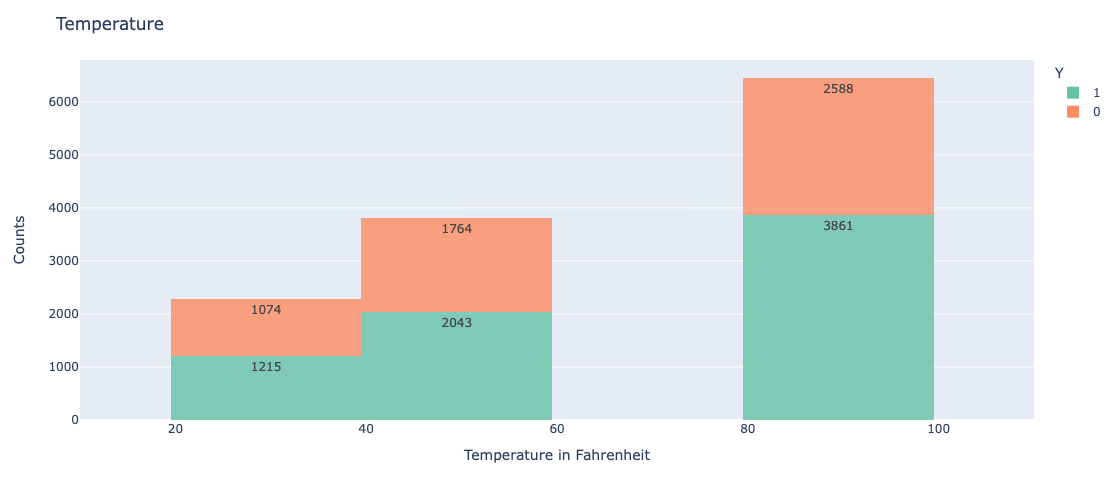

In [655]:
# Plotly graph showing the temperature and the acceptance, higher temperature has higher number of acceptance
fig1 = px.histogram(data_new, x = 'temperature', color = 'Y', text_auto=True, color_discrete_sequence = px.colors.qualitative.Set2, 
                    height=500, opacity=0.8, range_x=[10, 110])
# Add title and axis lables
fig1.update_layout(
    title_text='Temperature', # title of plot
    xaxis_title_text='Temperature in Fahrenheit', # xaxis label
    yaxis_title_text='Counts', # yaxis label
)
fig1.show()

Histogram of destinations, color showing acceptance and acceptance values
No urgent has a larger number of acceptance, not event if we combine home and work the numbers are higher than the one
for not urgent

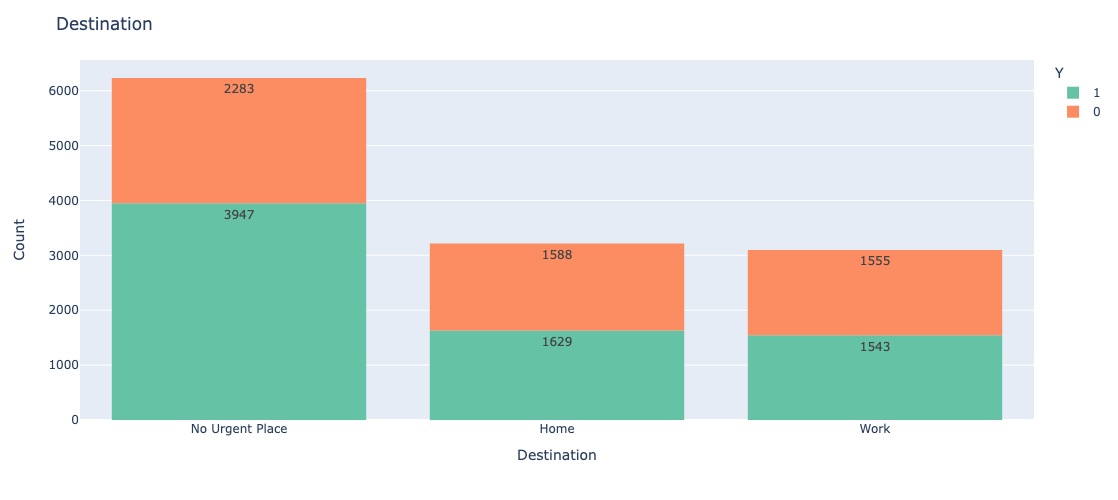

In [521]:
#Plotly histogram
fig1 = px.histogram(data_new, x = 'destination', color = 'Y', text_auto=True, color_discrete_sequence = px.colors.qualitative.Set2, height=500)
# Add title and axis lables
fig1.update_layout(
    title_text='Destination', # title of plot
    xaxis_title_text='Destination', # xaxis label
    yaxis_title_text='Count', # yaxis label
)
fig1.show()

The histogram on time is interesting for the biggest numbers of coupons are at 7 am and 6 pm, before work, school 
and after

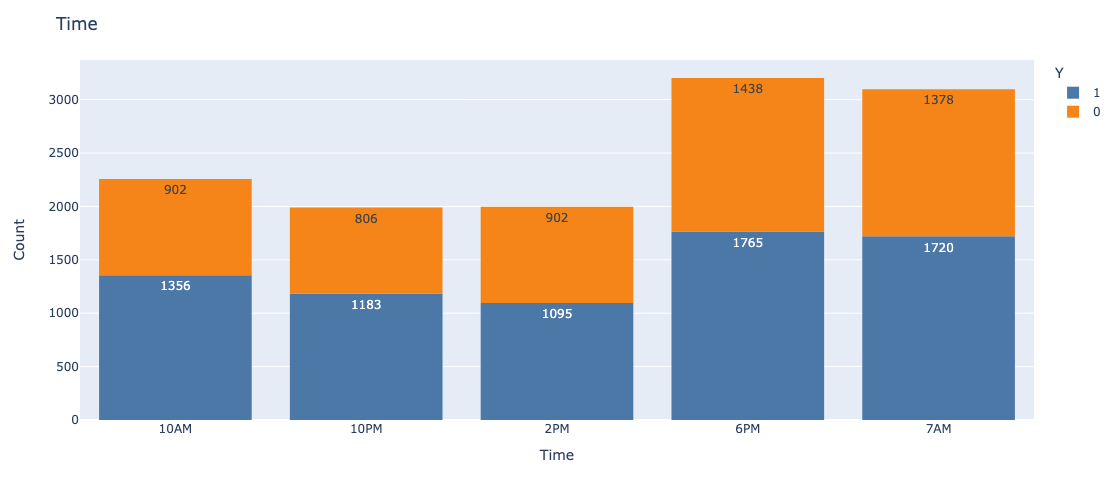

In [658]:
#Plotly histogram
fig2 = px.histogram(data_new, x = 'time', color = 'Y', text_auto=True, color_discrete_sequence = px.colors.qualitative.T10, height=500)
# Add title and axis lables
fig2.update_layout(
    title_text='Time', # title of plot
    xaxis_title_text='Time', # xaxis label
    yaxis_title_text='Count', # yaxis label
)
fig2.show()

In [ ]:
This graph shows age and the acceptance. Younger people has accepted more coupons than older people, it will be interesting
to compare this graph with the one for income to check the relationship

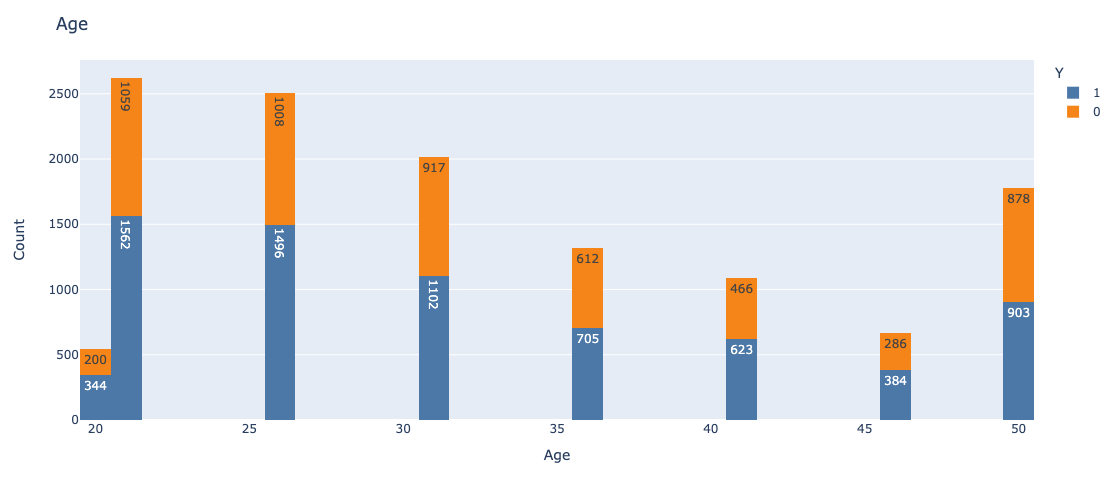

In [722]:
#Plotly histogram 
fig2 = px.histogram(data_new, x = 'age', color = 'Y', text_auto=True, 
                    color_discrete_sequence = px.colors.qualitative.T10, height=500)
# Add title and axis lables
fig2.update_layout(
    title_text='Age', # title of plot
    xaxis_title_text='Age', # xaxis label
    yaxis_title_text='Count', # yaxis label
)
fig2.show()

The graph below include the acceptance of drivers with passages. As shown the drivers with kids or partners are 
less likely to accept the coupons

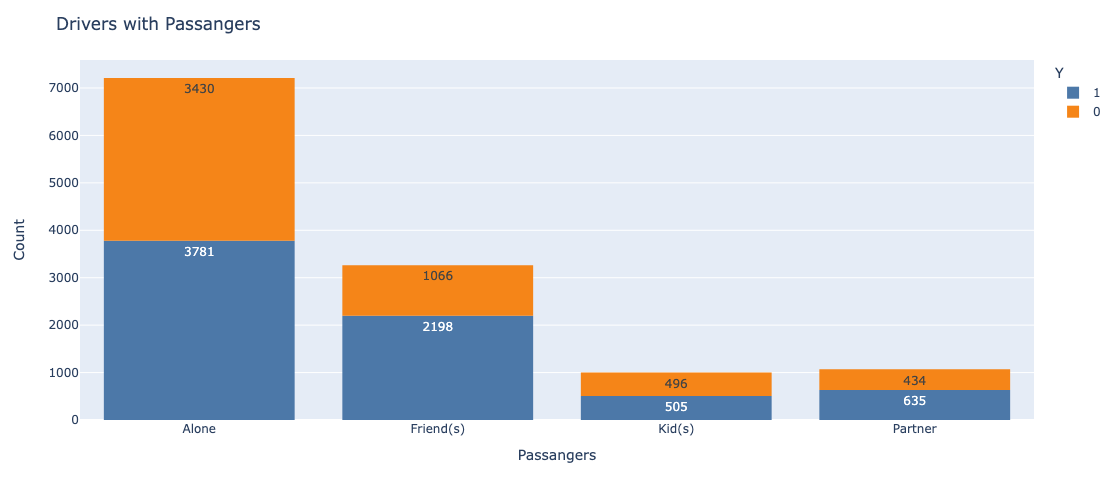

In [723]:
# Plotly histogram
fig2 = px.histogram(data_new, x = 'passanger', color = 'Y', text_auto=True, color_discrete_sequence = px.colors.qualitative.T10, height=500)
# Add title and axis lables
fig2.update_layout(
    title_text='Drivers with Passangers', # title of plot
    xaxis_title_text='Passangers', # xaxis label
    yaxis_title_text='Count', # yaxis label
)
fig2.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [695]:
# Create a new dataframe based on a query on Bar
bar_data = data_new.query('coupon == "Bar"')
bar_data.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


Text(0.5, 0, 'Bar')

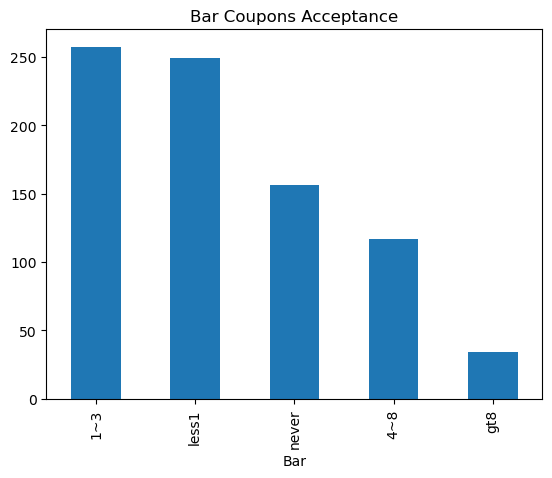

In [683]:
# Plot the Bar accepted data on a bar graph
bar_data.query('Y == 1')['Bar'].value_counts().plot(kind = 'bar')
plt.title('Bar Coupons Acceptance')
plt.xlabel('Bar')

2. What proportion of bar coupons were accepted?
**The 41% of the drivers accepted the coupons**

In [684]:
# Since the population proportion p is the same as the mean μ of the corresponding population of zeros and ones

bar_data.Y.mean()

0.40988517224163756

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

   I have included 1 to 3, less that 1, and never compare to 4 or more times for drivers visiting bars in a month.
   **The acceptance rate is 4.4 times higher for those who visit the bar 3 or fewer times a month**

In [686]:
# Using query to add the conditions then just take the size of the result on shape
three_or_fewer = bar_data.query('Y == 1 & (Bar == "1~3" | Bar == "less1" | Bar == "never")').shape[0]
more_than_3 = bar_data.query('Y == 1 & (Bar == "4~8" | Bar == "gt8")').shape[0]

# Getting the ratio by diving the 2 values calculated above
ratio_three_or_fewer_to_more = three_or_fewer / more_than_3
print(ratio_three_or_fewer_to_more)

4.3841059602649


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

**The acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others is: 1.174. So most of the drivers who accepted the coupons are over 25 years old and go more that once to a bar. Even though the acceptance on drivers who are 21 years old is high, the sum all others is higher as we can see on the age graph above**


In [685]:
# Using query to add the conditions then just take the size of the result on shape
once_or_more = bar_data.query('Y == 1 & (Bar == "1~3" | Bar == "4~8" | Bar == "gt8")  & age > 25').shape[0]
all_others = bar_data.query('Y == 1 & age < 25').shape[0]

# Getting the ratio by diving the 2 values calculated above
ratio_once_or_more_to_all_others = once_or_more / all_others
print(ratio_once_or_more_to_all_others)

1.174089068825911


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

**The acceptance rate is high for drivers with no kids and no farmers, fishermen, and foresters (0.965). Makes sense since kids cannot enter a bar at least in the US. It will be good to compare the occupation distribution for have input on farmers and fishermen**


In [698]:
# Using query to add the conditions then just take the size of the result on shape
once_or_more_no_kids = bar_data.query('Y == 1 & (Bar == "1~3" | Bar == "4~8" | Bar == "gt8") & passanger != "Kid(s)" & occupation != "Farming Fishing & Forestry"').shape[0]
all_others = bar_data.query('Y == 1 & (Bar == "never" | Bar == "less1")').shape[0]

# Getting the ratio by diving the 2 values calculated above
ratio_once_or_more_no_kids_to_all_others = once_or_more_no_kids / all_others
print(ratio_once_or_more_no_kids_to_all_others)

0.9654320987654321


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.

**Comapre drivers going to bar (no passager kids, no widow, once or more) to drivers going to cheap restastaurant (4 times or more
 and income less 50K) rate is: 6.32**



In [703]:
# Using query to add the conditions then just take the size of the result on shape
# Not sure where the "and to" to compare
bar_once_widowed = bar_data.query('Y == 1 & (Bar == "1~3" | Bar == "4~8" | Bar == "gt8") & passanger != "Kid(s)" & maritalStatus != "Widowed"').shape[0]
bar_once_under30 = bar_data.query('Y == 1 & (Bar == "1~3" | Bar == "4~8" | Bar == "gt8") & age < 30').shape[0]
cheap_restaturant = data_new.query('Y == 1 & coupon == "Restaurant(<20)" & (RestaurantLessThan20 == "4~8" | RestaurantLessThan20 == "gt8") & income == "$37500 - $49999"').shape[0]

# Getting the ratio by diving the 2 values calculated above
ratio_bar_to_cheap_rest = (bar_once_widowed + bar_once_under30) / cheap_restaturant
print(f' go to bars more than once a month, had passengers that were not a kid, and were not widowed: {bar_once_widowed}')
print(f' go to bars more than once a month and are under the age of 30: {bar_once_under30}')
print(f' go to cheap restaurants more than 4 times a month and income is less than 50K: {cheap_restaturant}')
print(f' Comapre drivers going to bar (no passager kids, no widow, once or more) to drivers going to cheap restastaurant (4 times or more')
print(f' and income less 50K) rate is: {ratio_bar_to_cheap_rest}')

 go to bars more than once a month, had passengers that were not a kid, and were not widowed: 391
 go to bars more than once a month and are under the age of 30: 247
 go to cheap restaurants more than 4 times a month and income is less than 50K: 101
 Comapre drivers going to bar (no passager kids, no widow, once or more) to drivers going to cheap restastaurant (4 times or more
 and income less 50K) rate is: 6.316831683168317


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

   ### Regarding acceptance of the bar coupons:

1. More people that accept are people that goes 1 to 3 times for month compare to people that goes more frecuent. 
This makes because the regulars will be there with coupon or without
2. The proportion of people accepting bar coupons is of 41% 
3. Since the people accepting the coupons larger number of coupons are not regular and the acceptance is 41% means that this is a good
    campaign
4. Drivers with no kids as passanges and ocupation different from farming, fishing, or forestry and no regulars, have a higher acceptance 
than people under 30 years no regulars
5. Drivers who to bars more that once a month have **high acceptance rate**, especillay if there are not kids in the car

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Exploring the Coffee House coupons

In [704]:
# Create a new dataframe based on a query on Coffee house
chdf = data_new.query('coupon == "Coffee House"')
chdf.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [537]:
# Check the coffee house values
chdf.query('Y == 1')['CoffeeHouse'].value_counts()

CoffeeHouse
1~3      672
less1    511
4~8      364
gt8      225
never    175
Name: count, dtype: int64

<Axes: xlabel='CoffeeHouse'>

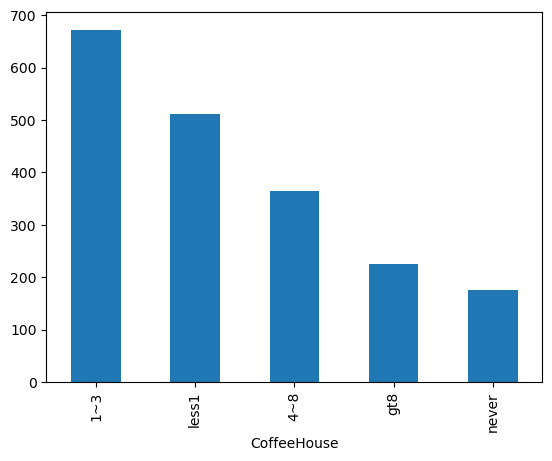

In [291]:
# Plot the coffee house accepted data on a bar graph
chdf.query('Y == 1')['CoffeeHouse'].value_counts().plot(kind = 'bar')

1. What proportion of bar coupons were accepted?

**49.9% coupons were accepted for coffee house**

In [705]:
# Calculating the proportion using mean sience the column has 1 and 0s
chdf.Y.mean()

0.49924357034795763

2. Compare the acceptance rate between those who went to a coffee house 3 or fewer times a month to those who went more.

**The acceptance rate is 2.3 times higher for those who went 3 or less times**

In [306]:
# Using query to add the conditions then just take the size of the result on shape
three_or_fewer = chdf.query('Y == 1 & (CoffeeHouse == "1~3" | CoffeeHouse == "less1" | CoffeeHouse == "never")').shape[0]
more_than_3 = chdf.query('Y == 1 & (CoffeeHouse == "4~8" | CoffeeHouse == "gt8")').shape[0]

# Getting the ratio by diving the 2 values calculated above
ratio_three_or_fewer_to_more = three_or_fewer / more_than_3
print(f'The acceptance rate is: {ratio_three_or_fewer_to_more}')

The acceptance rate is: 2.305602716468591


3. Compare the acceptance rate between those who went to a coffee house once or more a month and are driving home and drivers going to work

**The acceptance rate for those driving to Work is 0.34. Therefore drivers with no urgency accepted more coupons**

In [314]:
# Using query to add the conditions then just take the size of the result on shape
driving_to_work = chdf.query('Y == 1 & (CoffeeHouse == "1~3" | CoffeeHouse == "4~8" | CoffeeHouse == "gt8") & destination == "Work"').shape[0]
driving_no_urgent = chdf.query('Y == 1 & (CoffeeHouse == "1~3" | CoffeeHouse == "4~8" | CoffeeHouse == "gt8") & destination == "No Urgent Place"').shape[0]

# Getting the ratio by diving the 2 values calculated above
ratio_driving_work_and_no_urgent = driving_to_work / driving_no_urgent
print(f'The acceptance rate is: {ratio_driving_work_and_no_urgent}')

The acceptance rate is: 0.33989501312335957


4. Compare the acceptance rate between those who went to a coffee house 1 to 3 times month and are driving to work or driving home and those
with not urgency

**This an more interesting comparation. Drivers with destination home or work have an acceptance rate of 0.57 thus the drivers with no urgent desination have higher acceptance.

In [710]:
# Using query to add the conditions then just take the size of the result on shape
driving_with_urgency = chdf.query('Y == 1 & CoffeeHouse == "1~3" & (destination == "Work" | destination == "Home")').shape[0]
driving_no_urgent = chdf.query('Y == 1 & CoffeeHouse == "1~3" & destination == "No Urgent Place"').shape[0]

# Getting the ratio by diving the 2 values calculated above
ratio_driving_urgency_and_no_urgent = driving_with_urgency / driving_no_urgent
print(f'The acceptance rate is: {ratio_driving_urgency_and_no_urgent}')

The acceptance rate is: 0.5664335664335665


### Hypothesize about drivers who accepted the coffee house coupons

1. The proportion of coupons accepted for coffee house was 49.9%
2. The drivers who went 3 or less times a month took 2.3 more coupons than the drivers who went 4 or more times a month
3. Drivers with not urgent destination accepted more coupons that drivers with destination work
4. Drivers with destination home or work accepted more coupons that drivers with no urgent destination

### Summary of the Data Analys on the coupons dataset

### Data Cleaning and Transformations
- First steps was to identify duplicates, 74 records were dups
- Next dropped the duplicates from the datafram keeping the latest
- Checked for missing data and plot this information
- Analyze the null values
- Dropped records with no driver or driving a scooter or a motocycle
- Finally, removed extra characters from age and converted it to numeric

### Exploring the dataset

- 57% of the drivers of the total of observations accepted the coupons
- The number of coupons from biggest to smallest was distributed to coffee house, restaurant < 20, carry out & take away, bar, and restaurant from 20 to 50
- Comparing acceptance and rejected restaurant < 20 has the highest acceptance with 70%, the second one was coffee house with 49% acceptance
- More coupons were distributed on temperatures of >80 degrees and also those had higher acceptance
- Time category presented interested data for the best timing for acceptance was at 7 am and 6 pm, before the dat starts and after work or school
- As expected younger people had a higher coupon acceptance at the ages of 21 and 25

### Exploring Bar coupons acceptance

- Bar coupons for highest to lowest acceptance 1~3 times a month, less than 1, never, 4~8 times, and more than 8. The data shows that regulars will be in the bar with coupons or without.
- 41% of the drivers accepted the bar coupons
- The acceptance rate is 4.4 times higher for those who visit the bar 3 or fewer times a month
- The acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to all others is: 1.174. So most of the drivers who accepted the coupons are over 25 years old and go more that once to a bar. Even though the acceptance on drivers who are 21 years old is high, the sum all others is higher as we can see on the age graph above
- The acceptance rate is high for drivers with no kids and no farmers, fishermen, and foresters (0.965). Makes sense since kids cannot enter a bar at least in the US. It will be good to compare the occupation distribution for have input on farmers and fishermen

### Exploring Coffee House acceptance 

- The proportion of coupons accepted for coffee house was 49.9%
- The drivers who went 3 or less times a month took 2.3 more coupons than the drivers who went 4 or more times a month
- Drivers with not urgent destination accepted more coupons that drivers with destination work
- Drivers with destination home or work accepted more coupons that drivers with no urgent destination

### Next Steps
- Include some visualization including the acceptance, coupons, and some categories. I.e. including acceptance for restaurants under 20 and income
- Include acceptance rate including age and income for bar and restaurant
- Add acceptance for “to go” coupons and destination adding passenger
- Use aggregations and groupby from coupons throughout all 1~3, less1, .. and the categories i.e age, income, education, etc

**Finally, the graphs below show the acceptance distributions of the coupons, it is interesting to see that the acceptance was higher with drivers who visited the establishments 1 to 3 times per month or less than 1**

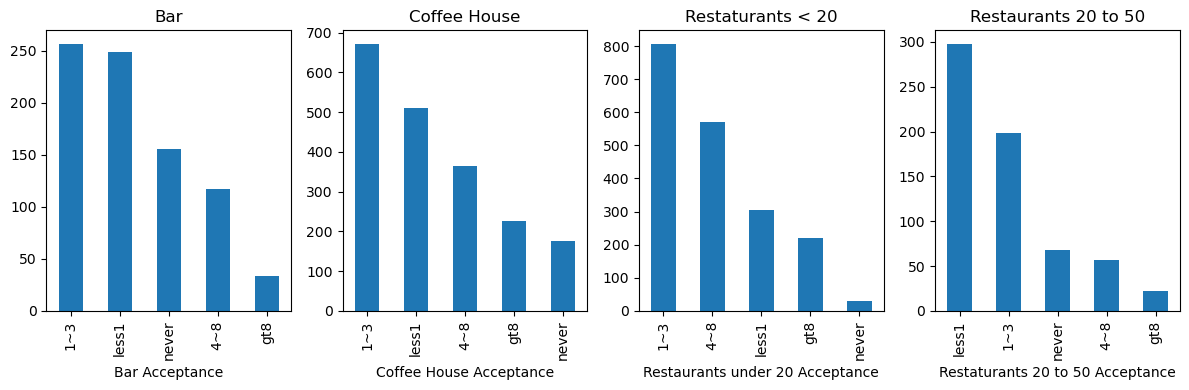

In [718]:
#Create 4 graphs in a row using matplotlib and bar since it easier to visualize the data
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
# Graph the accepted coupons adding a title for eache visualization and x labels
data_new.query('Y == 1 & coupon == "Bar"')['Bar'].value_counts().plot(ax=axes[0], kind='bar', title='Bar', 
                                                                      xlabel='Bar Acceptance',grid=False)
data_new.query('Y == 1 & coupon == "Coffee House"')['CoffeeHouse'].value_counts().plot(ax=axes[1], kind='bar', title='Coffee House',
                                                                                       xlabel='Coffee House Acceptance', grid=False)
data_new.query('Y == 1 & coupon == "Restaurant(<20)"')['RestaurantLessThan20'].value_counts().plot(ax=axes[2], kind='bar',
                                                                                                   title='Restaturants < 20',
                                                                                                   xlabel='Restaurants under 20 Acceptance',
                                                                                                   grid=False)
data_new.query('Y == 1 & coupon == "Restaurant(20-50)"')['Restaurant20To50'].value_counts().plot(ax=axes[3], kind='bar', 
                                                                                                 title='Restaurants 20 to 50',
                                                                                                 xlabel='Restaturants 20 to 50 Acceptance',
                                                                                                 grid=False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()